In [3]:
import pickle; import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal 
import scipy
import h5py
import tqdm

/home/kevin/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [39]:
NUM_BINS = 20
DATA_SOURCE = '../data/pca_images.pickle'
with open(DATA_SOURCE, 'rb') as f:
    (X, y) = pickle.load(f)
shapes = X.shape
X = np.reshape(X, (shapes[0], shapes[1], shapes[2], 1))

[0. 0. 0. ... 1. 1. 1.]


In [60]:
from keras import optimizers
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y_test)
print(X_test.shape)

[0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.

In [97]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dense, BatchNormalization, Dropout
from keras.activations import relu
from keras.layers.core import Flatten
    
def CNN():
    activation = 'sigmoid'
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(NUM_BINS,NUM_BINS,1)))
    model.add(Activation(activation))
    model.add(Dropout(0.5))
    model.add(Conv2D(10, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation(activation)) 
    model.add(Dropout(0.5))
#     model.add(Conv2D(10, kernel_size=(1,1), strides=(1,1), padding='same'))
#     model.add(Activation('relu')) 
#     model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    return model

In [98]:
print(X_train.shape, y.shape)
num_epochs = 100
cnn = CNN()
adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001)
cnn.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

metrics = dict(); metrics['acc'] = []; metrics['val_acc'] = []; metrics['loss'] = []; metrics['val_loss'] = []
for epoch in range(num_epochs):
    print("Epoch is", epoch)
    history = cnn.fit(X_train, y_train, validation_split=0.1, verbose=0)
    metrics['acc'].append(history.history['acc'])
    metrics['val_acc'].append(history.history['val_acc'])
    metrics['loss'].append(history.history['loss'])
    metrics['val_loss'].append(history.history['val_loss'])    


pred = cnn.predict(X_test)
pred = np.reshape(pred, len(pred))
acc = float(np.count_nonzero(np.equal(np.round(pred), y_test))) / len(pred)
print(acc)

(1541, 20, 20, 1) (1927,)
Epoch is 0
Epoch is 1
Epoch is 2
Epoch is 3
Epoch is 4
Epoch is 5
Epoch is 6
Epoch is 7
Epoch is 8
Epoch is 9
Epoch is 10
Epoch is 11
Epoch is 12
Epoch is 13
Epoch is 14
Epoch is 15
Epoch is 16
Epoch is 17
Epoch is 18
Epoch is 19
Epoch is 20
Epoch is 21
Epoch is 22
Epoch is 23
Epoch is 24
Epoch is 25
Epoch is 26
Epoch is 27
Epoch is 28
Epoch is 29
Epoch is 30
Epoch is 31
Epoch is 32
Epoch is 33
Epoch is 34
Epoch is 35
Epoch is 36
Epoch is 37
Epoch is 38
Epoch is 39
Epoch is 40
Epoch is 41
Epoch is 42
Epoch is 43
Epoch is 44
Epoch is 45
Epoch is 46
Epoch is 47
Epoch is 48
Epoch is 49
Epoch is 50
Epoch is 51
Epoch is 52
Epoch is 53
Epoch is 54
Epoch is 55
Epoch is 56
Epoch is 57
Epoch is 58
Epoch is 59
Epoch is 60
Epoch is 61
Epoch is 62
Epoch is 63
Epoch is 64
Epoch is 65
Epoch is 66
Epoch is 67
Epoch is 68
Epoch is 69
Epoch is 70
Epoch is 71
Epoch is 72
Epoch is 73
Epoch is 74
Epoch is 75
Epoch is 76
Epoch is 77
Epoch is 78
Epoch is 79
Epoch is 80
Epoch is 81


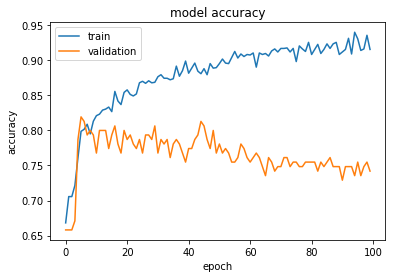

In [99]:
plt.plot(metrics['acc'])
plt.plot(metrics['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

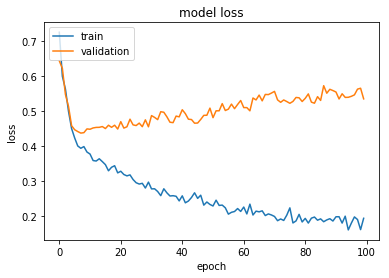

In [100]:
plt.plot(metrics['loss'])
plt.plot(metrics['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')